# create_figures_main

__Author__: Emma Crenshaw \
__Date__:   07/19/2023

__Purpose__: Take code from cluster array runs to create the main figures for the manuscript

In [1]:
import networkx as nx
import random
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import itertools
import seaborn as sns

#%matplotlib notebook
%matplotlib inline

In [2]:
# Set all font sizes
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Number of vaccine doses available each day

In [3]:
# Plot number of vaccinations
vax_cover = pd.read_excel("mpox_vax_coverage_data.xlsx", header = None)

# Get number of vaccines available per day (repeat each 7 times because original is by week)
daily_num_FD = np.rint(np.repeat(vax_cover.iloc[10, 1:].astype(float),7).tolist()).astype(int)
daily_num_SD = np.rint(np.repeat(vax_cover.iloc[11, 1:].astype(float),7).tolist()).astype(int)

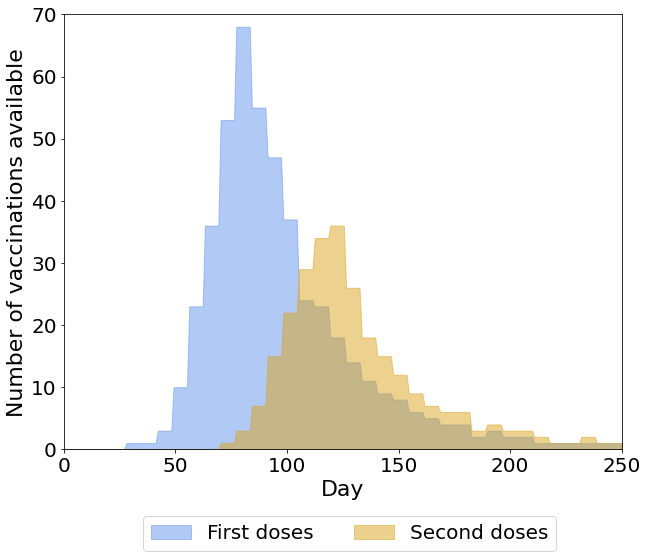

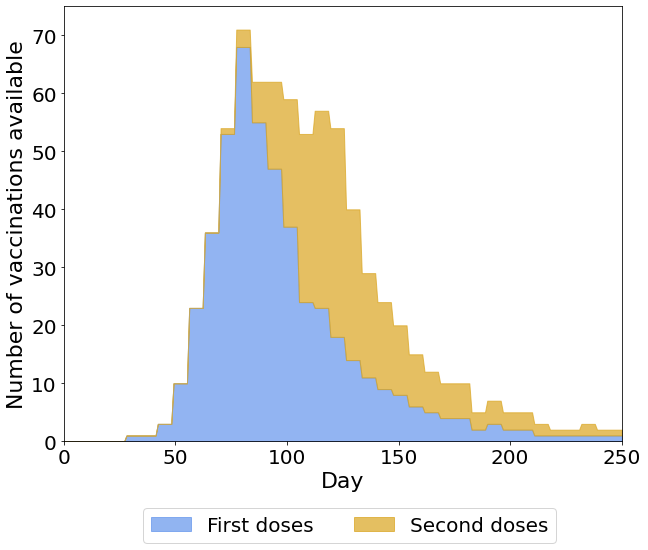

In [6]:
x = np.linspace(0, 250, 250)

# Option 1
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
box = ax.get_position()
ax.fill_between(x, daily_num_FD[:250], label = "First doses", color='cornflowerblue', alpha = 0.5)
ax.fill_between(x, daily_num_SD[:250], label = "Second doses", color='goldenrod', alpha = 0.5)
ax.legend()
plt.xlabel("Day")
plt.ylabel("Number of vaccinations available")
ax.legend(bbox_to_anchor=(0.9, -0.13), ncol = 2)
ax.set_xlim(0,250)
ax.set_ylim(0,70)
plt.savefig('vax_availability.pdf', dpi=300, bbox_inches = "tight")

# Option 2
doses = np.row_stack((daily_num_FD[:250],daily_num_SD[:250]))   
dose_stack = np.cumsum(doses, axis=0)   # a 3x10 array

fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(111)
box = ax1.get_position()
ax1.fill_between(x, 0, dose_stack[0,:], alpha=.7, label = "First doses", color='cornflowerblue')
ax1.fill_between(x, dose_stack[0,:], dose_stack[1,:], alpha=.7, label = "Second doses", color='goldenrod')
plt.xlabel("Day")
plt.ylabel("Number of vaccinations available")
ax1.legend(bbox_to_anchor=(0.9, -0.13), ncol = 2)
ax1.set_xlim(0,250)
ax1.set_ylim(0,75)
plt.savefig('vax_availability_stacked.pdf', dpi=300, bbox_inches = "tight")

## Heatmaps

In [7]:
# Bring in data
path = "output/"

# Isolation scenario = 2 (partial compliance)
date = "2024-09-27"

neg25 = np.array(pd.read_csv(path+'30to110-2-0.25-2-0to-30-2/mpox_30to110-2-0.25-2-0to-30-2_' + date + '.csv'))
pos25 = np.array(pd.read_csv(path+'30to110-2-0.25-2-5to30-2/mpox_30to110-2-0.25-2-5to30-2_' + date + '.csv'))
neg5 = np.array(pd.read_csv(path+'30to110-2-0.5-2-0to-30-2/mpox_30to110-2-0.5-2-0to-30-2_' + date + '.csv'))
pos5 = np.array(pd.read_csv(path+'30to110-2-0.5-2-5to30-2/mpox_30to110-2-0.5-2-5to30-2_' + date + '.csv'))
neg75 = np.array(pd.read_csv(path+'30to110-2-0.75-2-0to-30-2/mpox_30to110-2-0.75-2-0to-30-2_' + date + '.csv'))
pos75 = np.array(pd.read_csv(path+'30to110-2-0.75-2-5to30-2/mpox_30to110-2-0.75-2-5to30-2_' + date + '.csv'))

# Isolation scenario = 1 (full compliance)
date = "2024-09-27"

neg25_1 = np.array(pd.read_csv(path+'30to110-2-0.25-1-0to-30-2/mpox_30to110-2-0.25-1-0to-30-2_' + date + '.csv'))
pos25_1 = np.array(pd.read_csv(path+'30to110-2-0.25-1-5to30-2/mpox_30to110-2-0.25-1-5to30-2_' + date + '.csv'))
neg5_1 = np.array(pd.read_csv(path+'30to110-2-0.5-1-0to-30-2/mpox_30to110-2-0.5-1-0to-30-2_' + date + '.csv'))
pos5_1 = np.array(pd.read_csv(path+'30to110-2-0.5-1-5to30-2/mpox_30to110-2-0.5-1-5to30-2_' + date + '.csv'))
neg75_1 = np.array(pd.read_csv(path+'30to110-2-0.75-1-0to-30-2/mpox_30to110-2-0.75-1-0to-30-2_' + date + '.csv'))
pos75_1 = np.array(pd.read_csv(path+'30to110-2-0.75-1-5to30-2/mpox_30to110-2-0.75-1-5to30-2_' + date + '.csv'))


In [8]:
# Isolation scenario = 2
neg25 = pd.DataFrame(neg25[neg25[:,0]!=0])
pos25 = pd.DataFrame(pos25[pos25[:,0]!=0])
df25 = pd.concat([neg25,pos25], axis=0)

neg5 = pd.DataFrame(neg5[neg5[:,0]!=0])
pos5 = pd.DataFrame(pos5[pos5[:,0]!=0])
df5 = pd.concat([neg5,pos5], axis=0)

neg75 = pd.DataFrame(neg75[neg75[:,0]!=0])
pos75 = pd.DataFrame(pos75[pos75[:,0]!=0])
df75 = pd.concat([neg75,pos75], axis=0)


# Isolation scenario = 1
neg25_1 = pd.DataFrame(neg25_1[neg25_1[:,0]!=0])
pos25_1 = pd.DataFrame(pos25_1[pos25_1[:,0]!=0])
df25_1 = pd.concat([neg25_1,pos25_1], axis=0)

neg5_1 = pd.DataFrame(neg5_1[neg5_1[:,0]!=0])
pos5_1 = pd.DataFrame(pos5_1[pos5_1[:,0]!=0])
df5_1 = pd.concat([neg5_1,pos5_1], axis=0)

neg75_1 = pd.DataFrame(neg75_1[neg75_1[:,0]!=0])
pos75_1 = pd.DataFrame(pos75_1[pos75_1[:,0]!=0])
df75_1 = pd.concat([neg75_1,pos75_1], axis=0)

In [9]:
mean_df25 = df25.groupby(df25.columns[[1,2]].tolist())[df25.columns[3:]].mean()
mean_df5 = df5.groupby(df5.columns[[1,2]].tolist())[df5.columns[3:]].mean()
mean_df75 = df75.groupby(df75.columns[[1,2]].tolist())[df75.columns[3:]].mean()

mean_df25_1 = df25_1.groupby(df25_1.columns[[1,2]].tolist())[df25_1.columns[3:]].mean()
mean_df5_1 = df5_1.groupby(df5_1.columns[[1,2]].tolist())[df5_1.columns[3:]].mean()
mean_df75_1 = df75_1.groupby(df75_1.columns[[1,2]].tolist())[df75_1.columns[3:]].mean()

In [10]:
div_by = 10000/100 #number of nodes / number of simulations
keep_res25 = mean_df25.iloc[:,-1]/div_by
keep_res5 = mean_df5.iloc[:,-1]/div_by
keep_res75 = mean_df75.iloc[:,-1]/div_by

keep_res25_1 = mean_df25_1.iloc[:,-1]/div_by
keep_res5_1 = mean_df5_1.iloc[:,-1]/div_by
keep_res75_1 = mean_df75_1.iloc[:,-1]/div_by

In [11]:
mat25 = keep_res25.unstack(level=1)
mat5 = keep_res5.unstack(level=1)
mat75 = keep_res75.unstack(level=1)

mat25_1 = keep_res25_1.unstack(level=1)
mat5_1 = keep_res5_1.unstack(level=1)
mat75_1 = keep_res75_1.unstack(level=1)

# insert a blank row between -1 year and -30 days
def insert_nan_row(matrix):
    row_to_insert = np.full((1, matrix.shape[1]), np.nan)  # Create a row of NaNs
    matrix_with_nan = np.vstack([matrix[:2], row_to_insert, matrix[2:]])  # Insert NaN row between second and third rows
    return matrix_with_nan

# Apply the function to each of the matrices
mat25_with_space = insert_nan_row(np.array(mat25))
mat5_with_space = insert_nan_row(np.array(mat5))
mat75_with_space = insert_nan_row(np.array(mat75))

mat25_1_with_space = insert_nan_row(np.array(mat25_1))
mat5_1_with_space = insert_nan_row(np.array(mat5_1))
mat75_1_with_space = insert_nan_row(np.array(mat75_1))

In [12]:
# Calibrate the values over both heatmaps
values = np.hstack([mat25_with_space, mat5_with_space, mat75_with_space, mat25_1_with_space, mat5_1_with_space, mat75_1_with_space]).ravel().tolist()

values2 = [x for x in values if x == x]

norm = mcolors.Normalize(np.min(values2), np.max(values2)) 

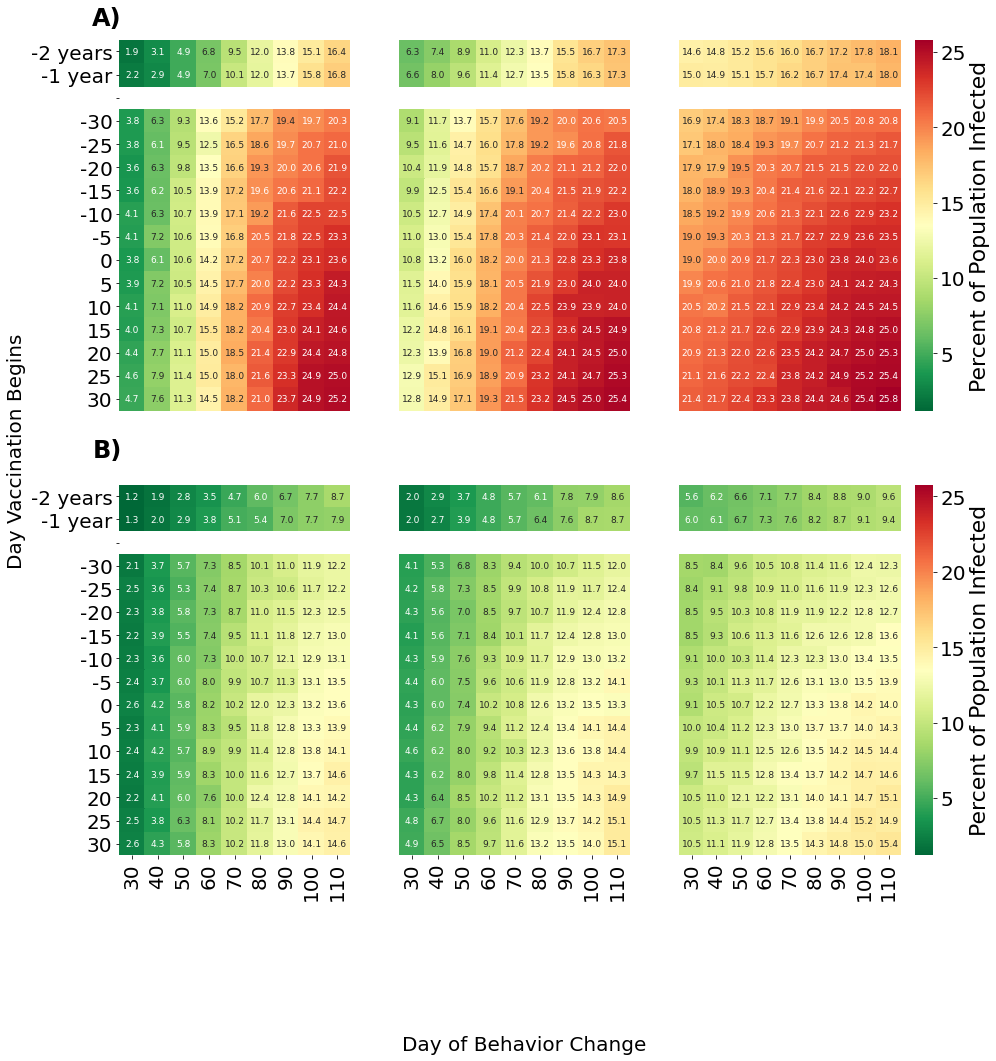

In [13]:
### Heatmap with both isolation options

fig, ax = plt.subplots(2, 3, figsize = (15,15), gridspec_kw={'width_ratios': [1, 1, 1.2]})

## Row 1 = less optimistic isolation
sns.heatmap(mat25_with_space, ax=ax[0,0], cmap='RdYlGn_r', norm=norm, cbar = False, annot=True, fmt=".1f", annot_kws={"fontsize":9},
            xticklabels = False,#xticklabels = [30,40,50,60,70,80,90,100,110], 
            yticklabels = ['-2 years', '-1 year', "",-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
#ax[0,0].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 75%')

sns.heatmap(mat5_with_space, ax=ax[0,1], cmap='RdYlGn_r', norm = norm, cbar = False, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = False)#, xticklabels = [30,40,50,60,70,80,90,100,110])
#ax[0,1].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 50%')
            
sns.heatmap(mat75_with_space, ax=ax[0,2], cmap='RdYlGn_r', norm = norm, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = False,# xticklabels = [30,40,50,60,70,80,90,100,110],
           cbar_kws={'label': 'Percent of Population Infected'})
#ax[0,2].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 25%')


## Row 2 = more optimisitc
sns.heatmap(mat25_1_with_space, ax=ax[1,0], cmap='RdYlGn_r', norm=norm, cbar = False, annot=True, fmt=".1f", annot_kws={"fontsize":9},
            xticklabels = [30,40,50,60,70,80,90,100,110], 
            yticklabels = ['-2 years', '-1 year', "",-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
#ax[1,0].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 75%')

sns.heatmap(mat5_1_with_space, ax=ax[1,1], cmap='RdYlGn_r', norm = norm, cbar = False, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = [30,40,50,60,70,80,90,100,110])
#ax[1,1].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 50%')
            
sns.heatmap(mat75_1_with_space, ax=ax[1,2], cmap='RdYlGn_r', norm = norm, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = [30,40,50,60,70,80,90,100,110],
           cbar_kws={'label': 'Percent of Population Infected'})
#ax[1,2].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 25%')

fig.text(0.5, -0.05, 'Day of Behavior Change', ha='center', va='center')
fig.text(0.03, 0.5, 'Day Vaccination Begins', ha='center', va='center', rotation='vertical')

fig.text(0.1, 0.9, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.1, 0.5, 'B)', va='center', fontweight = 'bold', fontsize = 24)

plt.savefig('create figures/heatmap_30to110_-2Yrto30_25to75_quar2_' + date + '.pdf', dpi=600, bbox_inches = "tight")

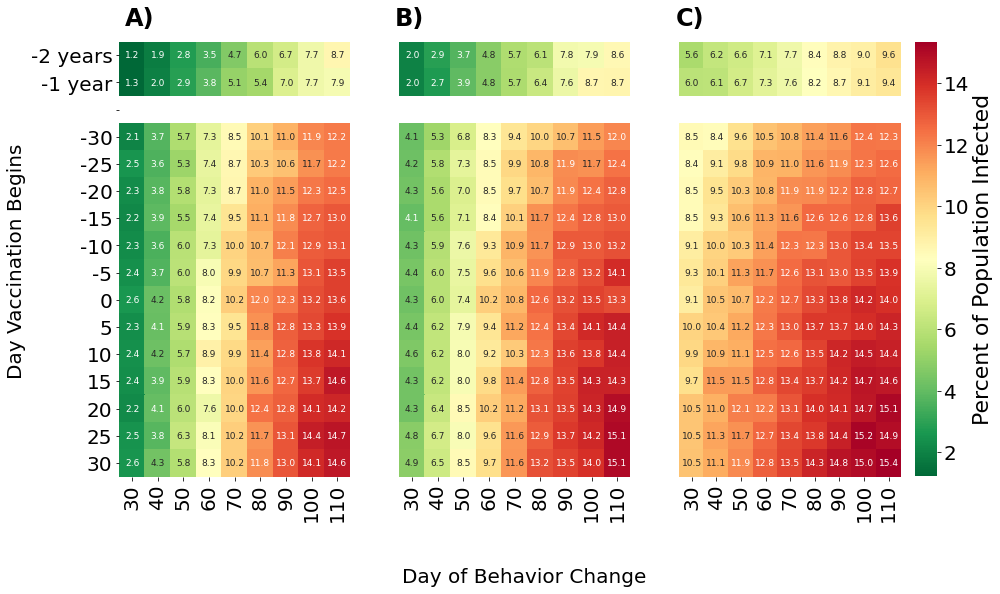

In [14]:
values = np.hstack([mat25_1_with_space, mat5_1_with_space, mat75_1_with_space]).ravel().tolist()

values2 = [x for x in values if x == x]

norm = mcolors.Normalize(np.min(values2), np.max(values2)) 

# reshape for heatmap

fig, ax = plt.subplots(1, 3, figsize = (15,8), gridspec_kw={'width_ratios': [1, 1, 1.2]})

## Row 2 = more optimisitc
sns.heatmap(mat25_1_with_space, ax=ax[0], cmap='RdYlGn_r', norm=norm, cbar = False, annot=True, fmt=".1f", annot_kws={"fontsize":9},
            xticklabels = [30,40,50,60,70,80,90,100,110], 
            yticklabels = ['-2 years', '-1 year', "",-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
#ax[1,0].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 75%')

sns.heatmap(mat5_1_with_space, ax=ax[1], cmap='RdYlGn_r', norm = norm, cbar = False, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = [30,40,50,60,70,80,90,100,110])
#ax[1,1].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 50%')
            
sns.heatmap(mat75_1_with_space, ax=ax[2], cmap='RdYlGn_r', norm = norm, annot=True, fmt=".1f",annot_kws={"fontsize":9},
            yticklabels = False, xticklabels = [30,40,50,60,70,80,90,100,110],
           cbar_kws={'label': 'Percent of Population Infected'})
#ax[1,2].set(xlabel = "", ylabel = "",title = 'Behavior reduction: 25%')

fig.text(0.5, -0.05, 'Day of Behavior Change', ha='center', va='center')
fig.text(0.03, 0.5, 'Day Vaccination Begins', ha='center', va='center', rotation='vertical')

fig.text(0.13, 0.92, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.38, 0.92, 'B)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.64, 0.92, 'C)', va='center', fontweight = 'bold', fontsize = 24)

plt.savefig('create figures/heatmap_30to110_-2Yrto30_25to75_quar1_' + date + '.pdf', dpi=600, bbox_inches = "tight")

## Intervention Comparison

In [15]:
# Read in baseline
num_nodes = 10000
div_by = num_nodes / 100


path = "output/"

# baseline, no interventions
base = np.array(pd.read_csv(path+'70-0-0.5-012-30-0/mpox_70-0-0.5-012-30-0_2024-09-27.csv'))

# Read in behavior change scenario 1, no vax
beh1vax0 = np.array(pd.read_csv(path+'70-1-0.5-012-30-0/mpox_70-1-0.5-012-30-0_2024-10-02.csv'))

# Read in behavior change scenario 1, vax scenario 1
beh1vax1 = np.array(pd.read_csv(path+'70-1-0.5-012-30-1/mpox_70-1-0.5-012-30-1_2024-10-02.csv'))

# Read in behavior change scenario 2, no vax
beh2vax0 = np.array(pd.read_csv(path + '70-2-0.5-012-30-0/mpox_70-2-0.5-012-30-0_2024-09-27.csv'))

# Read in behavior change scenario 2, vax scenario 2
beh2vax2 = np.array(pd.read_csv(path+'70-2-0.5-012-30-2/mpox_70-2-0.5-012-30-2_2024-09-27.csv'))


# Only use the data (ignore rows that were create as empty due to the cluster not being 0-indexed)
# Column 0 indicates the simulation number, the first simulation number is 1
base = base[base[:,0]!=0]
beh1vax0 = beh1vax0[beh1vax0[:,0]!=0]
beh1vax1 = beh1vax1[beh1vax1[:,0]!=0]
beh2vax0 = beh2vax0[beh2vax0[:,0]!=0]
beh2vax2 = beh2vax2[beh2vax2[:,0]!=0]



In [16]:
# Column 1 indicates the isolation scenario (0 = no isolation, 1 = full compliance, 2 = partial compliance)
# Name convention is behavioral intervention (0, 1, or 2), vaccination scenario (0, 1, or 2), and isolation scenario

# No intervention
base_0 = base[base[:,1] == 0] # Isolation scenario 0
base_1 = base[base[:,1] == 1] # Isolation scenario 1
base_2 = base[base[:,1] == 2] # Isolation scenario 2

# Behavioral scenario 1 (universal behavior change), vaccination scenario 0 (no vaccination)
beh1vax0_0 = beh1vax0[beh1vax0[:,1]==0]
beh1vax0_1 = beh1vax0[beh1vax0[:,1]==1]
beh1vax0_2 = beh1vax0[beh1vax0[:,1]==2]

# Behavioral scenario 1 (universal behavior change), vaccination scenario 1 (universally available vaccination)
beh1vax1_0 = beh1vax1[beh1vax1[:,1]==0]
beh1vax1_1 = beh1vax1[beh1vax1[:,1]==1]
beh1vax1_2 = beh1vax1[beh1vax1[:,1]==2]

# Behavioral scenario 2 (targeted behavior change), vaccination scenario 0 (no vaccination)
beh2vax0_0 = beh2vax0[beh2vax0[:,1]==0]
beh2vax0_1 = beh2vax0[beh2vax0[:,1]==1]
beh2vax0_2 = beh2vax0[beh2vax0[:,1]==2]

# Behavioral scenario 2 (targeted behavior change), vaccination scenario 2 (targeted vaccination)
beh2vax2_0 = beh2vax2[beh2vax2[:,1]==0]
beh2vax2_1 = beh2vax2[beh2vax2[:,1]==1]
beh2vax2_2 = beh2vax2[beh2vax2[:,1]==2]

In [17]:
# Average over the simulations and drop columns that indicate simulation number and isolation scenario
base_2_mean = np.mean(base_2, axis = 0)[2:]
beh1vax0_2_mean = np.mean(beh1vax0_2, axis = 0)[2:]
beh1vax1_2_mean = np.mean(beh1vax1_2, axis = 0)[2:]

base_1_mean = np.mean(base_1, axis = 0)[2:]
beh1vax0_1_mean = np.mean(beh1vax0_1, axis = 0)[2:]
beh1vax1_1_mean = np.mean(beh1vax1_1, axis = 0)[2:]

beh2vax0_1_mean = np.mean(beh2vax0_1, axis = 0)[2:]
beh2vax2_1_mean = np.mean(beh2vax2_1, axis = 0)[2:]

Left, mean (IQR):  26.5152 [25.8775 26.47   27.09  ]
Middle, mean (IQR):  21.141199999999998 [19.7975 21.125  22.5925]
Right, mean (IQR):  20.206 [18.5575 20.345  21.9975]


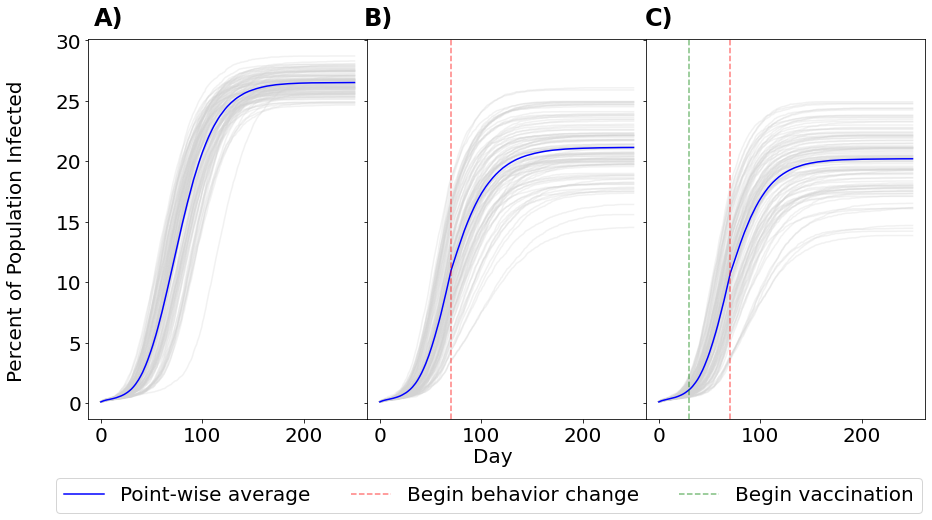

In [18]:
## Figure for less-optimistic isolation scenario (partial compliance)

# Just show baseline, behavior 1/vax 0, and behavior 1/vax 1, isolation = 2
x = np.linspace(0,250,250)

fig = plt.figure(figsize = (15,7))
gs = fig.add_gridspec(1, 3, hspace=0.0, wspace=0.0)
(ax1, ax2, ax3) = gs.subplots(sharex='col', sharey=True)
fig.text(0.5, 0.04, 'Day', ha='center')
fig.text(0.05, 0.5, 'Percent of Population Infected', va='center', rotation='vertical')

ax_list = [ax1, ax2, ax3]
df_list = [base_2_mean, beh1vax0_2_mean, beh1vax1_2_mean]

for i in range(99):
    ax1.plot(x, base_2[i,2:]/div_by, color = 'lightgray', alpha = 0.3)
    ax2.plot(x, beh1vax0_2[i,2:]/div_by, color = 'lightgray', alpha = 0.3)
    ax3.plot(x, beh1vax1_2[i,2:]/div_by, color = 'lightgray', alpha = 0.3)
    
ax1.plot(x, base_2_mean/div_by, color = 'blue')
ax2.plot(x, beh1vax0_2_mean/div_by, color = 'blue')
ax3.plot(x, beh1vax1_2_mean/div_by, color = 'blue', label = "Point-wise average")

for ax in [ax2, ax3]:
    ax.axvline(x = 70, color = "red", alpha = 0.5, linestyle = "dashed", label = "Begin behavior change")
    
for ax in [ax3]:
    ax.axvline(x = 30, color = 'green', alpha = 0.5, linestyle = "dashed", label = "Begin vaccination")


    
# Shrink current axis by 20%
box = ax3.get_position()

# Put a legend below the current axis
ax3.legend(loc='center left', bbox_to_anchor=(-2.15, -0.2), ncol = 3)

fig.text(0.13, 0.92, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.38, 0.92, 'B)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.64, 0.92, 'C)', va='center', fontweight = 'bold', fontsize = 24)

# Put a legend to the right of the current axis
plt.savefig('cumul_inf_base_beh_both_quar2.pdf', dpi=600, bbox_inches = "tight")

# Print out results to put in text
print("Left, mean (IQR): ", base_2_mean[-1]/div_by, np.percentile(base_2[:,-1]/div_by, [25, 50, 75]))
print("Middle, mean (IQR): ", beh1vax0_2_mean[-1]/div_by, np.percentile(beh1vax0_2[:,-1]/div_by, [25, 50, 75]))
print("Right, mean (IQR): ", beh1vax1_2_mean[-1]/div_by, np.percentile(beh1vax1_2[:,-1]/div_by, [25, 50, 75]))

Left, mean (IQR):  16.0311 [15.285 16.07  16.745]
Middle, mean (IQR):  10.9972 [ 9.185 11.05  12.8  ]
Right, mean (IQR):  11.2609 [ 9.8525 11.71   13.3525]


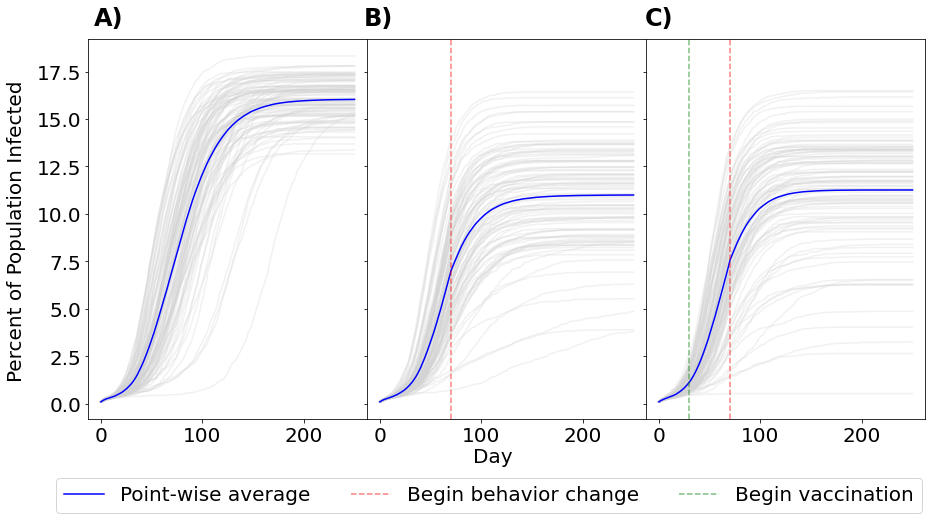

In [19]:
## Figure for more-optimistic isolation scenario (full compliance)

# Just show baseline, behavior 1/vax 0, and behavior 1/vax 1, isolation = 1
x = np.linspace(0,250,250)

fig = plt.figure(figsize = (15,7))
gs = fig.add_gridspec(1, 3, hspace=0.0, wspace=0.0)
(ax1, ax2, ax3) = gs.subplots(sharex='col', sharey=True)
fig.text(0.5, 0.04, 'Day', ha='center')
fig.text(0.05, 0.5, 'Percent of Population Infected', va='center', rotation='vertical')

ax_list = [ax1, ax2, ax3]
df_list = [base_1_mean, beh1vax0_1_mean, beh1vax1_1_mean]

for i in range(99):
    ax1.plot(x, base_1[i,2:]/div_by, color = 'lightgray', alpha = 0.3)
    ax2.plot(x, beh1vax0_1[i,2:]/div_by, color = 'lightgray', alpha = 0.3)
    ax3.plot(x, beh1vax1_1[i,2:]/div_by, color = 'lightgray', alpha = 0.3)
    
ax1.plot(x, base_1_mean/div_by, color = 'blue')
ax2.plot(x, beh1vax0_1_mean/div_by, color = 'blue')
ax3.plot(x, beh1vax1_1_mean/div_by, color = 'blue', label = "Point-wise average")

for ax in [ax2, ax3]:
    ax.axvline(x = 70, color = "red", alpha = 0.5, linestyle = "dashed", label = "Begin behavior change")
    
for ax in [ax3]:
    ax.axvline(x = 30, color = 'green', alpha = 0.5, linestyle = "dashed", label = "Begin vaccination")
    
# Shrink current axis by 20%
box = ax3.get_position()

# Put a legend below the current axis
ax3.legend(loc='center left', bbox_to_anchor=(-2.15, -0.2), ncol = 3)

fig.text(0.13, 0.92, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.38, 0.92, 'B)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.64, 0.92, 'C)', va='center', fontweight = 'bold', fontsize = 24)

plt.savefig('cumul_inf_base_beh_both_quar1.pdf', dpi=600, bbox_inches = "tight")

print("Left, mean (IQR): ", base_1_mean[-1]/div_by, np.percentile(base_1[:,-1]/div_by, [25, 50, 75]))
print("Middle, mean (IQR): ", beh1vax0_1_mean[-1]/div_by, np.percentile(beh1vax0_1[:,-1]/div_by, [25, 50, 75]))
print("Right, mean (IQR): ", beh1vax1_1_mean[-1]/div_by, np.percentile(beh1vax1_1[:,-1]/div_by, [25, 50, 75]))

Left, mean (IQR):  11.2609 [ 9.8525 11.71   13.3525]
Right, mean (IQR):  11.5658 [10.235  11.915  13.0475]


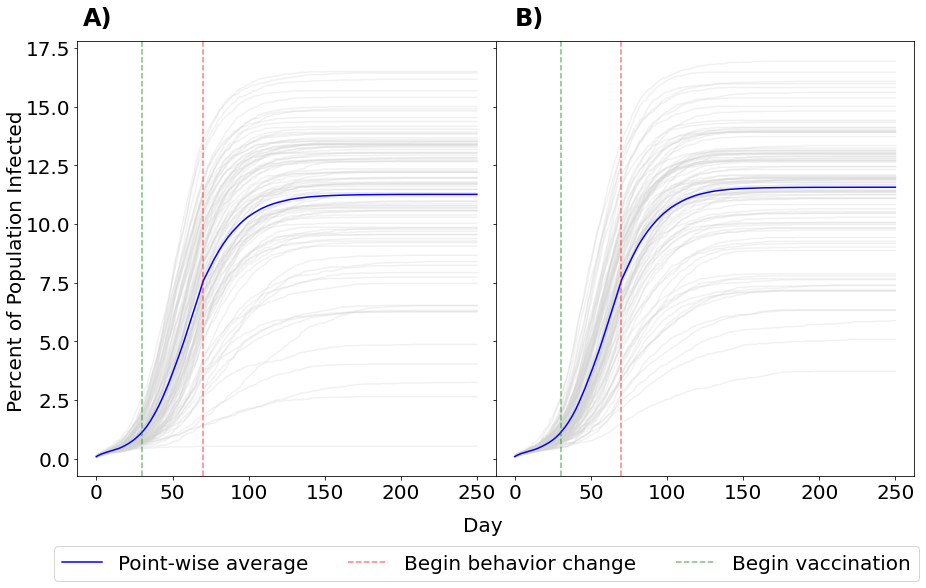

In [20]:
## Figure comparing universal vs targeted intervention with full isolation compliance

x = np.linspace(0,250,250)

fig = plt.figure(figsize = (15,8)) #if legend is below
gs = fig.add_gridspec(1, 2, hspace=0.0, wspace=0.0)
(ax5, ax6) = gs.subplots(sharex='col', sharey=True)
fig.text(0.5, 0.03, 'Day', ha='center')
fig.text(0.06, 0.5, 'Percent of Population Infected', va='center', rotation='vertical')

ax_list = [ax5, ax6]
df_list = [beh1vax1_1_mean, beh2vax2_1_mean]

for i in range(99):
    ax5.plot(x, beh1vax1_1[i,2:]/div_by, color = 'lightgray', alpha = 0.3)
    ax6.plot(x, beh2vax2_1[i,2:]/div_by, color = 'lightgray', alpha = 0.3)
    
ax5.plot(x, beh1vax1_1_mean/div_by, color = 'blue', label = "Point-wise average")
ax6.plot(x, beh2vax2_1_mean/div_by, color = 'blue', label = "Point-wise average")

for ax in [ax5, ax6]:
    ax.axvline(x = 70, color = "red", alpha = 0.5, linestyle = "dashed", label = "Begin behavior change")
    
for ax in [ax5, ax6]:
    ax.axvline(x = 30, color = 'green', alpha = 0.5, linestyle = "dashed", label = "Begin vaccination")
    

box = ax6.get_position()

# Put a legend below the current axis
ax6.legend(loc='center left', bbox_to_anchor=(-1.08, -0.2), ncol = 3)

fig.text(0.13, 0.92, 'A)', va='center', fontweight = 'bold', fontsize = 24)
fig.text(0.53, 0.92, 'B)', va='center', fontweight = 'bold', fontsize = 24)

plt.savefig('cumul_inf_bothall_bothtarget_quar1.pdf', dpi=600, bbox_inches = "tight")

print("Left, mean (IQR): ", beh1vax1_1_mean[-1]/div_by, np.percentile(beh1vax1_1[:,-1]/div_by, [25, 50, 75]))
print("Right, mean (IQR): ", beh2vax2_1_mean[-1]/div_by, np.percentile(beh2vax2_1[:,-1]/div_by, [25, 50, 75]))